# Prediction of Brain According to the Head Size

## Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import r2_score
# from sklearn.externals import joblib
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("headbrain.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [ ]:
df.sample(10)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
228,2,2,3735,1350
37,1,1,3748,1350
3,1,1,3777,1282
110,1,2,3695,1310
79,1,2,3835,1315
89,1,2,3907,1440
160,2,1,3071,1078
204,2,2,3067,1150
230,2,2,3685,1350
229,2,2,3218,1060


## Feature Selection

In [5]:
df=df.drop(['Gender','Age Range'],axis=1)

In [6]:
df.head()

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590


## Dividing the Dataset into Dependent and Indipendent Features

In [7]:
X = df.drop("Brain Weight(grams)",axis=1).values
y = df['Brain Weight(grams)'].values

## Making the Models

### DecisionTreeRegressor

In [11]:
from sklearn.tree import DecisionTreeRegressor
accu = []
for i in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=i)
    model1 = DecisionTreeRegressor(random_state = 0)
    model1.fit(X_train,y_train)
    y_pred1 = model1.predict(X_test)
    r21 = r2_score(y_test,y_pred1)
    accu.append(r21)
acc_array = np.array(accu)
acc1 = acc_array.max()
print("Accuracy : {}".format(acc1))
print("Random State: {}".format(acc_array.argmax()))

Accuracy : 0.6288535602112959
Random State: 3


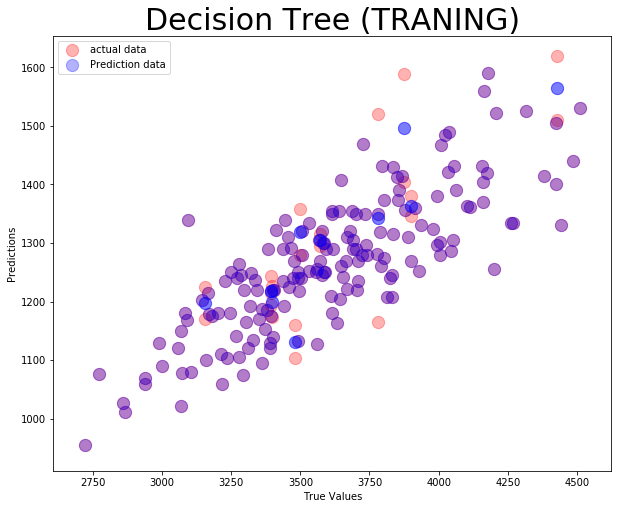

In [ ]:
plt.figure(figsize= (10,8))
plt.scatter(X_train, y_train,s=150,label='actual data',color='red',alpha=0.3)
plt.scatter(X_train,model1.predict(X_train),s=150,label='Prediction data',color='blue',alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend(loc = 'best')
plt.title("Decision Tree (TRANING)",size=30)
plt.show()

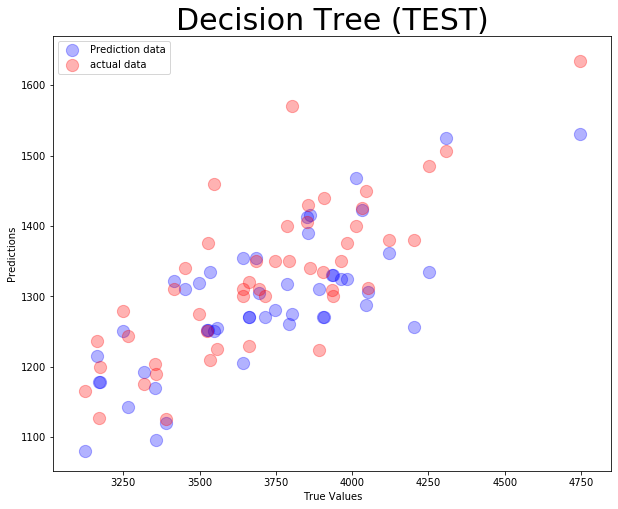

In [ ]:
plt.figure(figsize= (10,8))

plt.scatter(X_test,y_pred1,s=150,label='Prediction data',color='blue',alpha=0.3)
plt.scatter(X_test, y_test,s=150,label='actual data',color='red',alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend(loc = 'best')
plt.title("Decision Tree (TEST)",size=30)
plt.show()

## Random Forest Regressor

In [9]:
from sklearn.ensemble import RandomForestRegressor
accu = []
for i in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=i)
    model2 = RandomForestRegressor(n_estimators = 3, random_state = 10)
    model2.fit(X_train,y_train)
    y_pred2 = model2.predict(X_test)
    r22 = r2_score(y_test,y_pred2)
    accu.append(r22)
acc_array = np.array(accu)
acc2 = acc_array.max()
print("Accuracy : {}".format(acc2))
print("Random State: {}".format(acc_array.argmax()))

Accuracy : 0.7595713623951746
Random State: 3


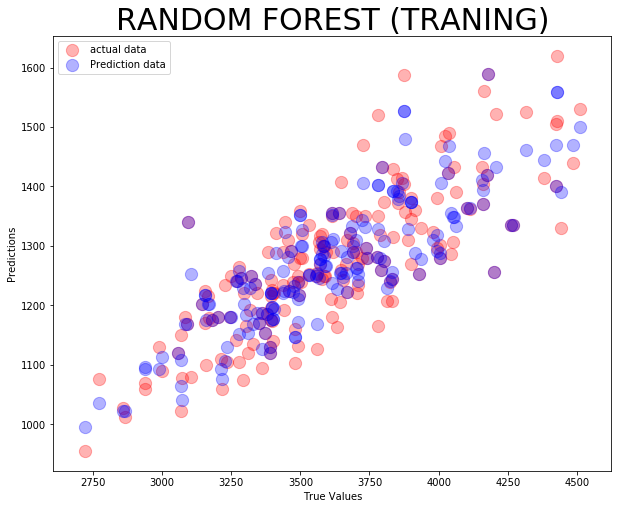

In [ ]:
plt.figure(figsize= (10,8))
plt.scatter(X_train, y_train,s=150,label='actual data',color='red',alpha=0.3)
plt.scatter(X_train,model2.predict(X_train),s=150,label='Prediction data',color='blue',alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend(loc = 'best')
plt.title("RANDOM FOREST (TRANING)",size=30)
plt.show()

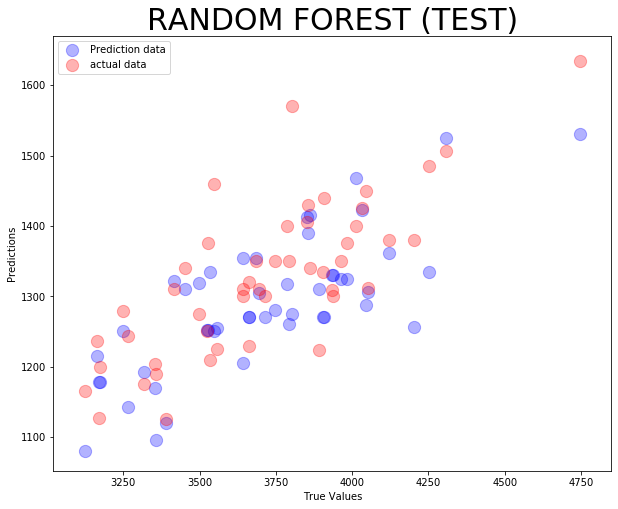

In [ ]:
plt.figure(figsize= (10,8))

plt.scatter(X_test,y_pred2,s=150,label='Prediction data',color='blue',alpha=0.3)
plt.scatter(X_test, y_test,s=150,label='actual data',color='red',alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend(loc = 'best')
plt.title("RANDOM FOREST (TEST)",size=30)
plt.show()

## Linear Regressor

In [10]:
from sklearn.linear_model import LinearRegression
accu = []
for i in range(0,500):
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=i)
    model3 = LinearRegression()
    model3.fit(X_train,y_train)
    y_pred3 = model3.predict(X_test)
    r23 = r2_score(y_test,y_pred3)
    accu.append(r23)
acc_array = np.array(accu)
acc3 = acc_array.max()
print("Accuracy : {}".format(acc3))
print("Random State: {}".format(acc_array.argmax()))

Accuracy : 0.8327458121021248
Random State: 10


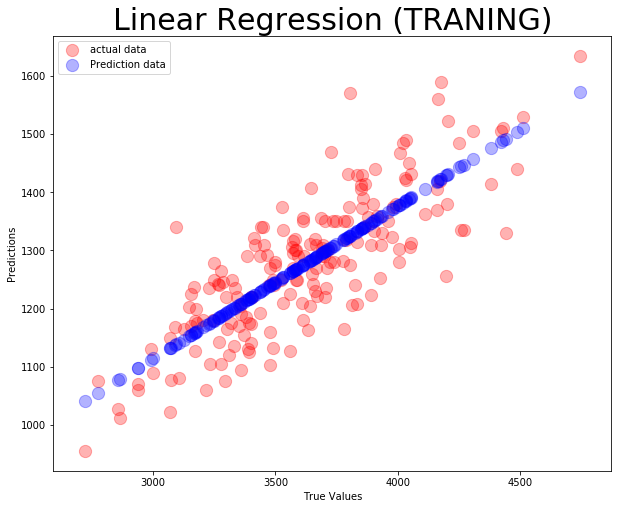

In [ ]:
plt.figure(figsize= (10,8))
plt.scatter(X_train, y_train,s=150,label='actual data',color='red',alpha=0.3)
plt.scatter(X_train,model3.predict(X_train),s=150,label='Prediction data',color='blue',alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend(loc = 'best')
plt.title("Linear Regression (TRANING)",size=30)
plt.show()

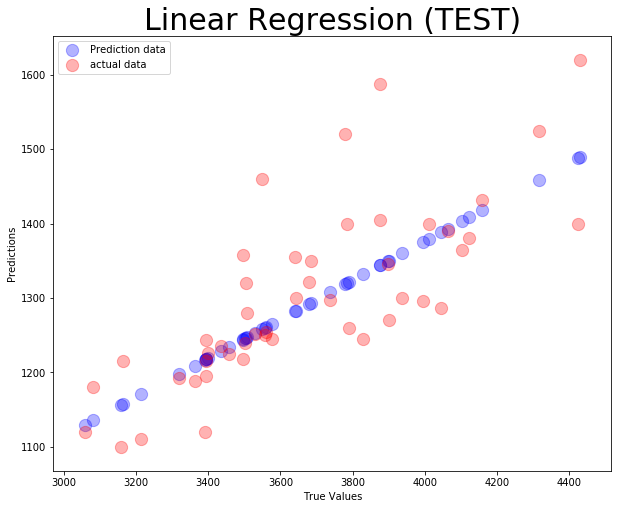

In [ ]:
plt.figure(figsize= (10,8))

plt.scatter(X_test,y_pred3,s=150,label='Prediction data',color='blue',alpha=0.3)
plt.scatter(X_test, y_test,s=150,label='actual data',color='red',alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend(loc = 'best')
plt.title("Linear Regression (TEST)",size=30)
plt.show()

## Comparing the models

<BarContainer object of 3 artists>

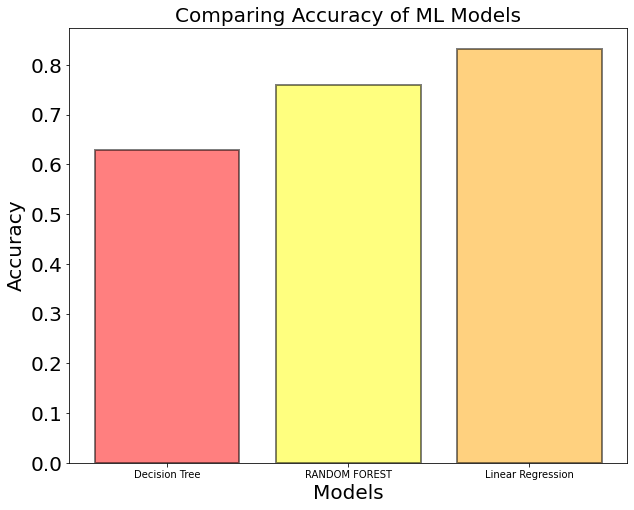

In [12]:
labels={'Decision Tree':acc1,'RANDOM FOREST':acc2,'Linear Regression':acc3}
plt.figure(figsize=(10,8))
plt.title('Comparing Accuracy of ML Models',fontsize=20)
colors=['red','yellow','orange']
plt.xticks(fontsize=10,color='black')
plt.yticks(fontsize=20,color='black')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels.keys(),labels.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5)

## Making of Pickle

In [14]:
import joblib
from joblib import dump, load
joblib.dump(model1,'BrainSize_DT.pkl')
joblib.dump(model2,'BrainSize_RF.pkl')
joblib.dump(model1,'BrainSize_LR.pkl')

['BrainSize_LR.pkl']

## Using the Pickle

In [15]:
Decision_Tree_model = joblib.load("BrainSize_DT.pkl")
Random_Forest_model = joblib.load("BrainSize_DT.pkl")
Linear_Regression_model = joblib.load("BrainSize_DT.pkl")

In [16]:
def Brain_weight1():
    head_size = float(input("\n Enter the Head Size: "))
    Weight = Decision_Tree_model.predict([[head_size]])
    print("The Weight of Brain can be " + str(Weight[0]) + " grms")

def Brain_weight2():
    head_size = float(input("\n Enter the Head Size: "))
    Weight = Random_Forest_model.predict([[head_size]])
    print("The Weight of Brain can be " + str(Weight[0]) + " grms")
    
def Brain_weight3():
    head_size = float(input("\n Enter the Head Size: "))
    Weight = Linear_Regression_model.predict([[head_size]])
    print("The Weight of Brain can be " + str(Weight[0]) + " grms")

In [20]:
Brain_weight3()


 Enter the Head Size: 3462
The Weight of Brain can be 1225.0 grms
